In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, explained_variance_score,  mean_absolute_error,  mean_squared_error

In [722]:
df = pd.read_pickle('final_data.pkl')
df = df.reset_index().drop(columns=['index'])
df.head()

,Country,Country Code,Year,GDP per Capita (PPP),Budget Surplus or Deficit (%GDP),Gross Savings %GDP,Inflation Rate on Consumer Prices (Annual %),Tax Revenue %GDP,Health Expenditure (%GDP),Education Expenditure (%GDP),"Science, Tech, Innovation R&D Expenditure (%GDP)",Military Expenditure %GDP,Fossil Fuel (%),Hydroelectric Plants (%),Renewable Energy Sources (%),SPI Year,Social Progress Index
0,Angola,AGO,2013,7682.477158,0.9,32.029882,8.777814,14.184763,37.049564,3.42132,0.032290,4.455239,36.800,60.2500,1.5875,2014,38.51
1,Botswana,BWA,2013,14707.701699,-7.9,36.664808,5.884607,25.609893,33.341854,9.63292,0.537280,2.056396,99.625,0.0000,0.5625,2014,62.99
2,Burkina Faso,BFA,2013,1683.107411,4.8,16.917850,0.533739,14.948642,28.408018,4.59384,0.509164,1.392049,81.725,9.5625,8.7375,2014,42.94
3,Burundi,BDI,2013,740.984231,-1.5,3.933888,7.937958,31.351000,33.161716,5.99536,0.210280,2.367638,13.800,77.0500,10.4000,2014,38.10
4,Ethiopia,ETH,2013,1283.570926,-6.0,28.334779,7.464022,8.764725,17.755827,4.49855,0.604740,0.806417,4.125,83.5625,11.9000,2014,39.31


In [285]:
target = df['Social Progress Index']
features = df.drop(columns = ['Country', 'Country Code', 'Year', 'SPI Year', 'Social Progress Index'])

In [723]:
features.head()

,GDP per Capita (PPP),Budget Surplus or Deficit (%GDP),Gross Savings %GDP,Inflation Rate on Consumer Prices (Annual %),Tax Revenue %GDP,Health Expenditure (%GDP),Education Expenditure (%GDP),"Science, Tech, Innovation R&D Expenditure (%GDP)",Military Expenditure %GDP,Fossil Fuel (%),Hydroelectric Plants (%),Renewable Energy Sources (%)
0,7682.477158,0.9,32.029882,8.777814,14.184763,37.049564,3.42132,0.032290,4.455239,36.800,60.2500,1.5875
1,14707.701699,-7.9,36.664808,5.884607,25.609893,33.341854,9.63292,0.537280,2.056396,99.625,0.0000,0.5625
2,1683.107411,4.8,16.917850,0.533739,14.948642,28.408018,4.59384,0.509164,1.392049,81.725,9.5625,8.7375
3,740.984231,-1.5,3.933888,7.937958,31.351000,33.161716,5.99536,0.210280,2.367638,13.800,77.0500,10.4000
4,1283.570926,-6.0,28.334779,7.464022,8.764725,17.755827,4.49855,0.604740,0.806417,4.125,83.5625,11.9000


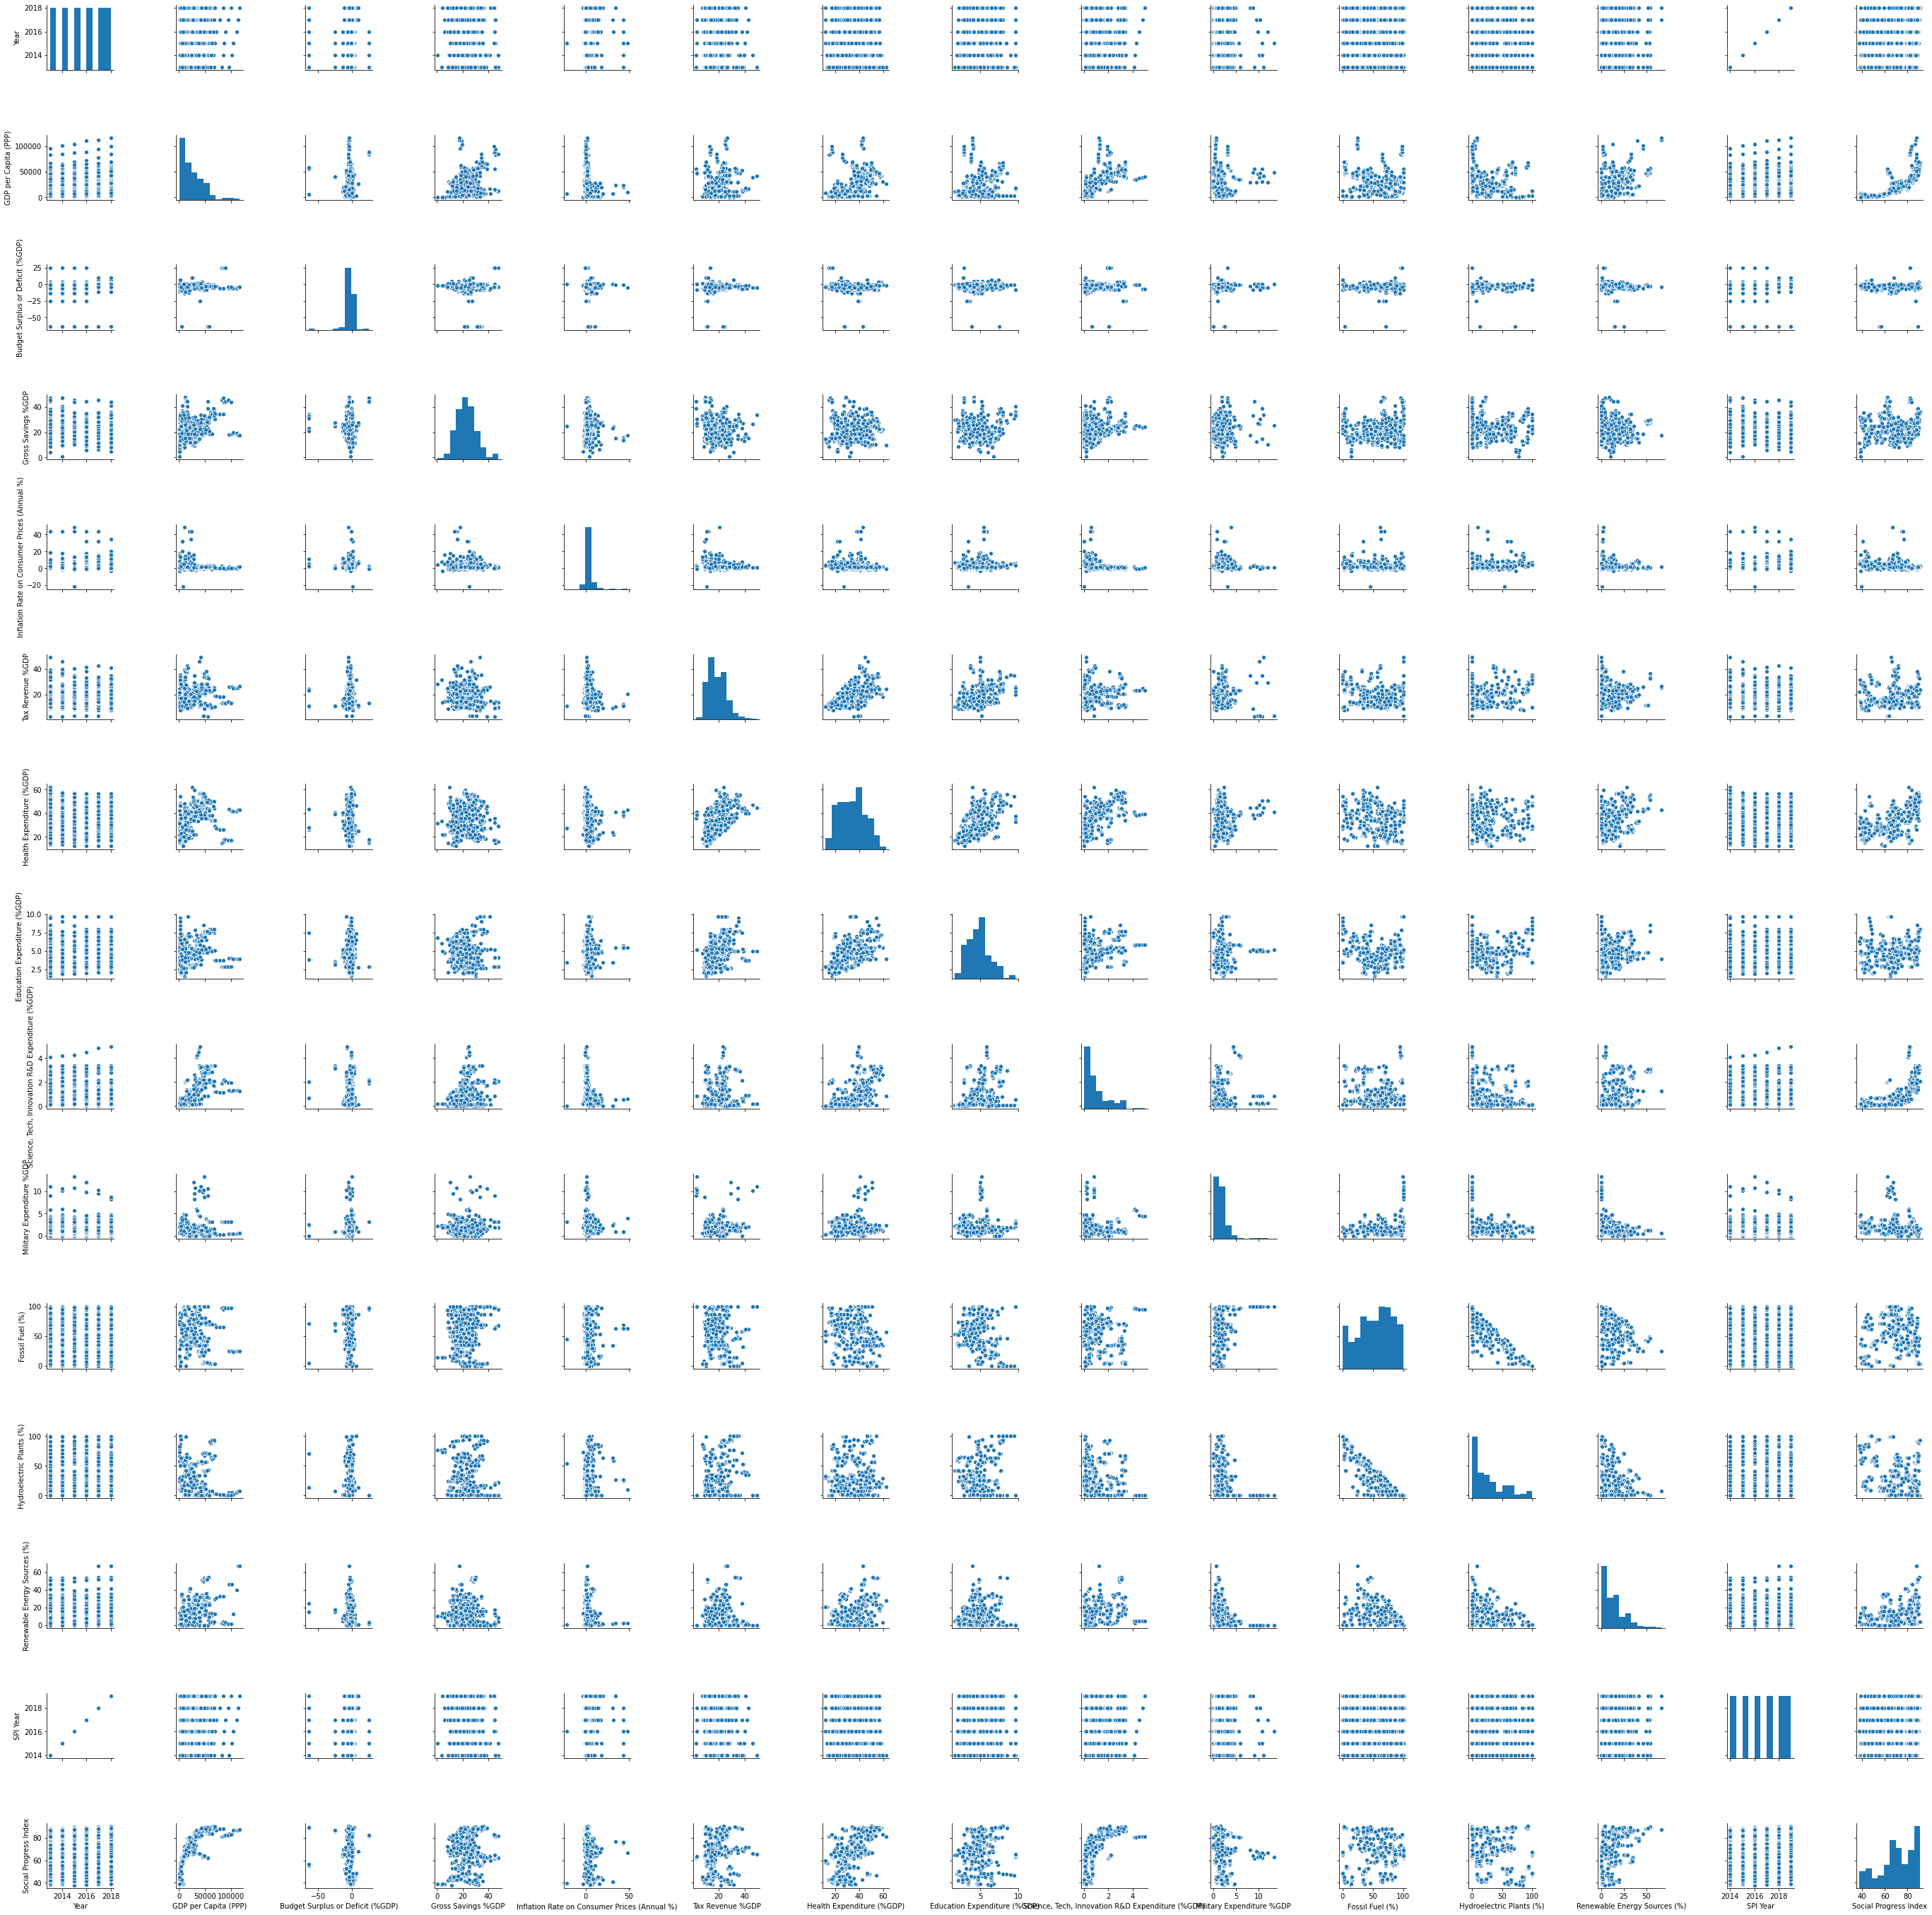

In [179]:
sns.pairplot(df)

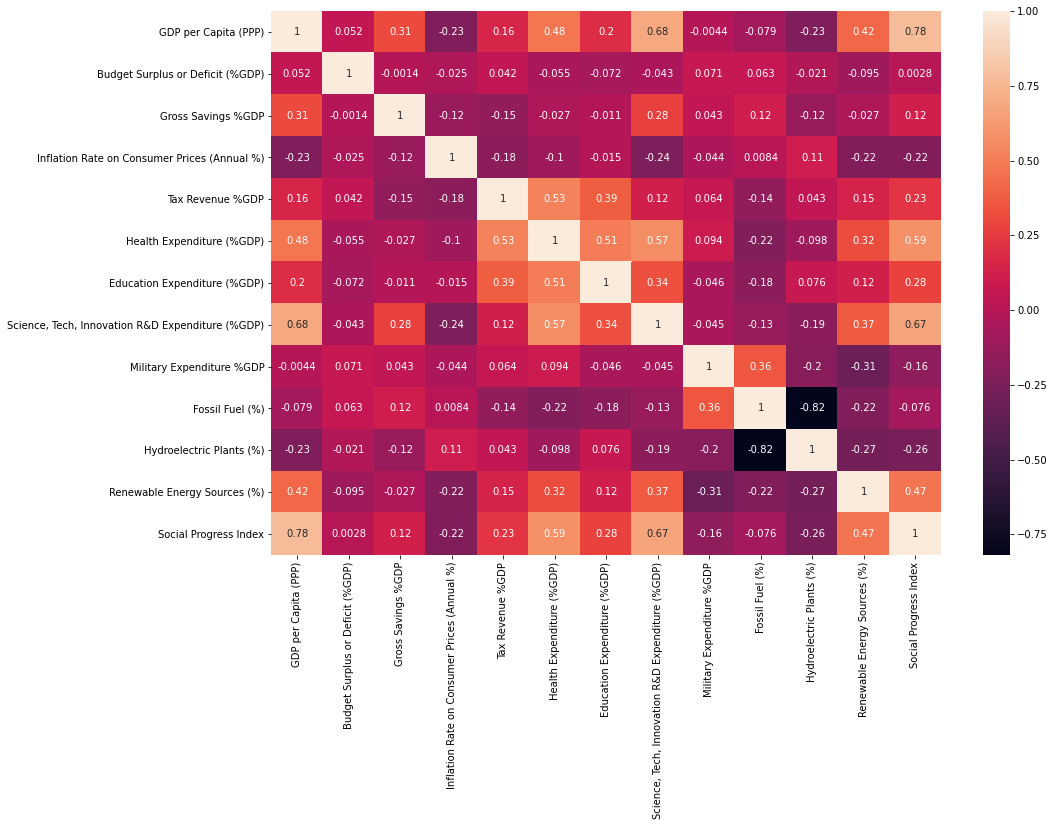

In [202]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.drop(columns=['Year', 'SPI Year']).corr(), annot=True)

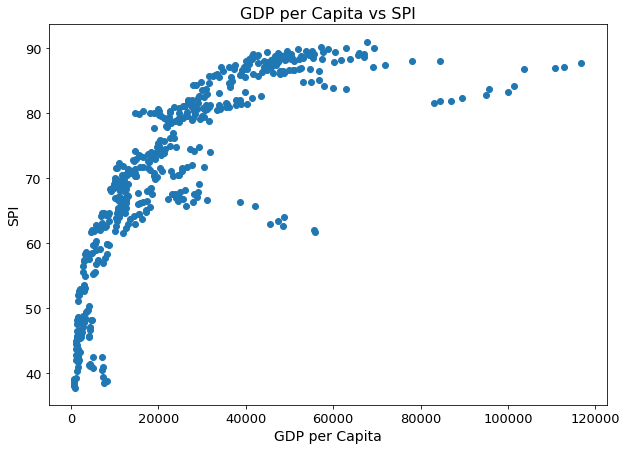

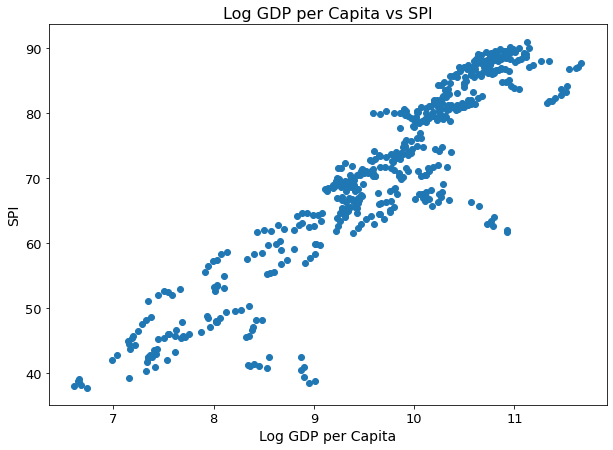

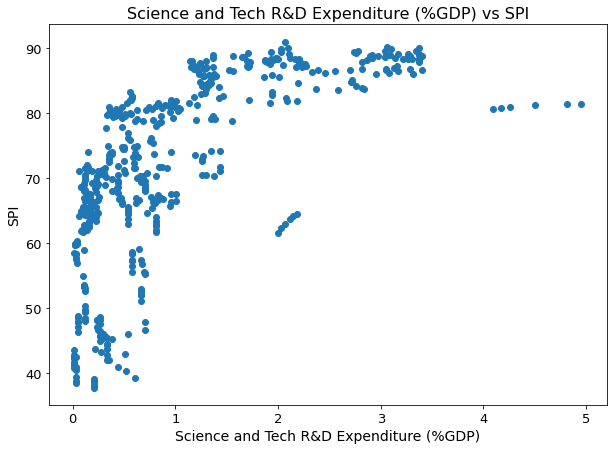

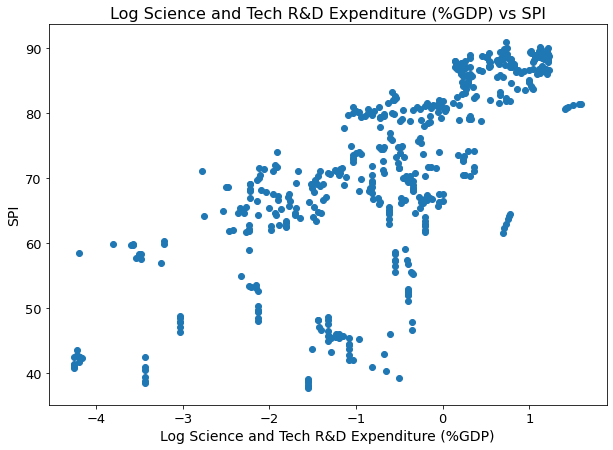

In [419]:
plt.figure(figsize=(10,7))
#plt.subplot(2, 2, 1)

plt.scatter(df['GDP per Capita (PPP)'], df['Social Progress Index'])
plt.xlabel('GDP per Capita', size = 14)
plt.ylabel('SPI', size = 14)
plt.title('GDP per Capita vs SPI', size = 16)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.savefig('GDP_SPI.svg');
plt.show()

plt.figure(figsize=(10,7))
#plt.subplot(2, 2, 2)
plt.scatter(np.log(df['GDP per Capita (PPP)']), df['Social Progress Index'])
plt.xlabel('Log GDP per Capita', size = 14)
plt.ylabel('SPI', size = 14)
plt.title('Log GDP per Capita vs SPI', size = 16)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.savefig('logGDP_SPI.svg');
plt.show()

plt.figure(figsize=(10,7))
#plt.subplot(2, 2, 3)
plt.scatter(df['Science, Tech, Innovation R&D Expenditure (%GDP)'], df['Social Progress Index'])
plt.xlabel('Science and Tech R&D Expenditure (%GDP)', size = 14)
plt.ylabel('SPI', size = 14)
plt.title('Science and Tech R&D Expenditure (%GDP) vs SPI', size = 16)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.savefig('RD_SPI.svg');
plt.show()

plt.figure(figsize=(10,7))
#plt.subplot(2, 2, 4)
plt.scatter(np.log(df['Science, Tech, Innovation R&D Expenditure (%GDP)']), df['Social Progress Index'])
plt.xlabel('Log Science and Tech R&D Expenditure (%GDP)', size = 14)
plt.ylabel('SPI', size = 14)
plt.title('Log Science and Tech R&D Expenditure (%GDP) vs SPI', size = 16)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.savefig('logRD_SPI.svg');
plt.show()


# Countries with Top Differences in SPI between 2014-2019

In [445]:
df.groupby(['Country','Country Code'])['Social Progress Index'].mean()

Country        Country Code
Angola         AGO             40.151667
Argentina      ARG             75.538333
Armenia        ARM             69.403333
Australia      AUS             87.666667
Austria        AUT             86.425000
                                 ...    
Tunisia        TUN             70.773333
Turkey         TUR             66.661667
Ukraine        UKR             66.776667
United States  USA             84.365000
Uruguay        URY             79.030000
Name: Social Progress Index, Length: 87, dtype: float64

In [454]:
a = np.array(df[df['SPI Year'] ==2019]['Social Progress Index'])

In [455]:
b = np.array(df[df['SPI Year'] ==2014]['Social Progress Index'])

In [485]:
SPI_growth = pd.DataFrame()
SPI_growth['Country'] = df['Country'].unique()
SPI_growth["SPI '19-'14 Difference"] = a-b

In [489]:
top_dec = SPI_growth.sort_values(by="SPI '19-'14 Difference")[:5].reset_index().drop(columns=['index'])
top_dec

,Country,SPI '19-'14 Difference
0,Nicaragua,-2.73
1,United States,-1.12
2,Brazil,-0.72
3,Hungary,-0.32
4,Colombia,-0.25


In [490]:
top_growth = SPI_growth.sort_values(by="SPI '19-'14 Difference", ascending=False)[:5].reset_index().drop(columns=['index'])
top_growth

,Country,SPI '19-'14 Difference
0,Ethiopia,6.10
1,Burkina Faso,4.88
2,Sri Lanka,4.51
3,Angola,4.07
4,Luxembourg,4.04


# Rate of GDP growth in Top Differences Countries

In [473]:
growth_dfs = []
dec_dfs = []
for country in top_growth.Country.tolist():
    growth_dfs.append(df[df.Country == country])
for country in top_dec.Country.tolist():
    dec_dfs.append(df[df.Country == country])

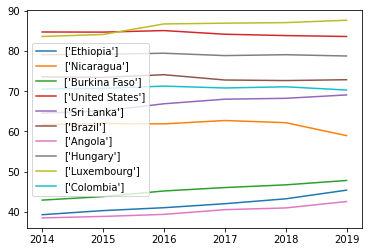

In [480]:
for country_g, country_d in zip(growth_dfs, dec_dfs):
    plt.plot(range(2014, 2020), country_g['Social Progress Index'], label = country_g.Country.unique())
    plt.plot(range(2014, 2020), country_d['Social Progress Index'], label = country_d.Country.unique())
plt.legend()

In [185]:
df_prep['log_GDP'] = np.log(df_prep['GDP per Capita (PPP)'])
df_prep['log_RD'] = np.log(df_prep['Science, Tech, Innovation R&D Expenditure (%GDP)'])
target = df_prep['Social Progress Index']
features = df_prep.drop(columns = ['Country', 'Country Code', 'Year', 'SPI Year', 'Social Progress Index'])

In [186]:
test_holdout = df_prep[df_prep['Year'] == 2018]
X_test, y_test = test_holdout.drop(columns = ['Country', 'Country Code', 'Year', 'SPI Year', 'Social Progress Index'], axis = 1), df_prep['Social Progress Index']

In [187]:
modeling_set = df_prep[df_prep['Year'] != 2018]
X, y = modeling_set.drop(columns = ['Country', 'Country Code', 'Year', 'SPI Year', 'Social Progress Index'], axis = 1), modeling_set['Social Progress Index']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

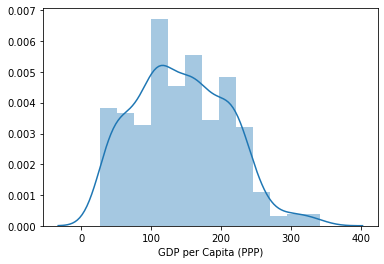

In [190]:
sns.distplot(np.sqrt(df['GDP per Capita (PPP)']))

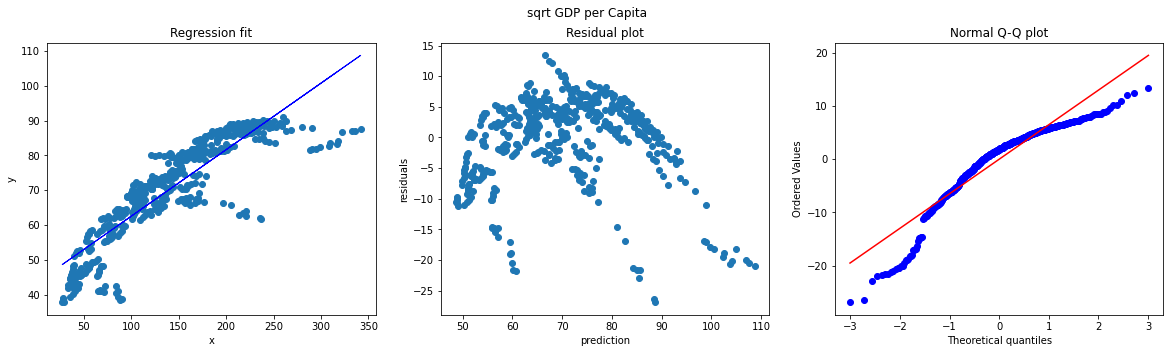

In [191]:
diagnostic_plot(np.array(np.sqrt(df['GDP per Capita (PPP)'])).reshape(-1,1), df['Social Progress Index'], name = 'sqrt GDP per Capita')

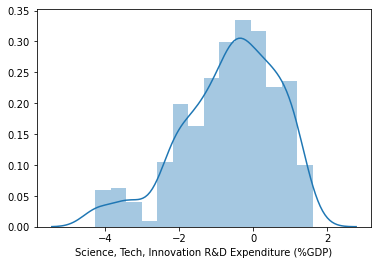

In [192]:
sns.distplot(np.log(df['Science, Tech, Innovation R&D Expenditure (%GDP)']))

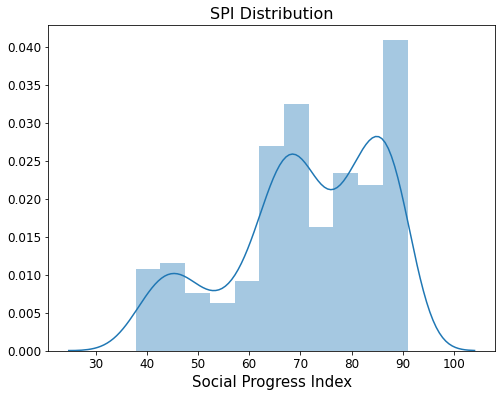

In [433]:
plt.figure(figsize=(8,6))
sns.distplot((df['Social Progress Index']))
plt.title('SPI Distribution', size = 16)
plt.xlabel('Social Progress Index', size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.savefig('SPI_dist.svg')

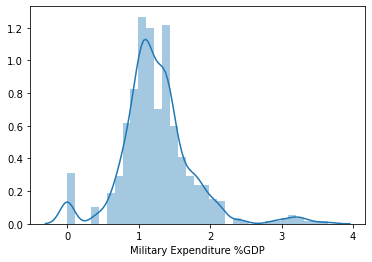

In [194]:
sns.distplot(np.sqrt(df['Military Expenditure %GDP']))

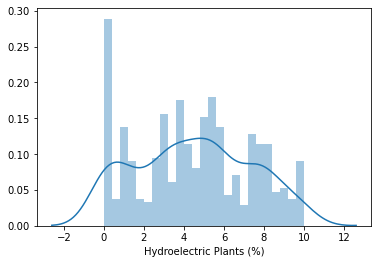

In [195]:
 sns.distplot((np.sqrt(df['Hydroelectric Plants (%)'])), bins=25)

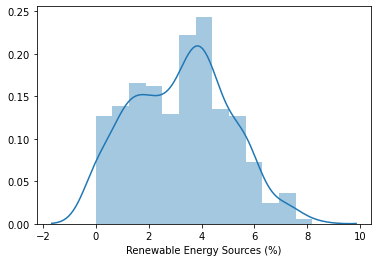

In [196]:
 sns.distplot((np.sqrt(df['Renewable Energy Sources (%)'])))

/Users/emilyng/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


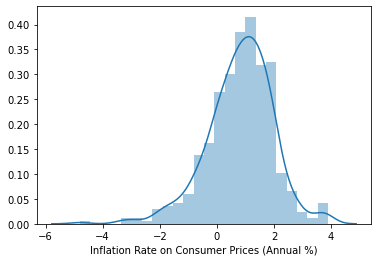

In [207]:
sns.distplot(np.log(df['Inflation Rate on Consumer Prices (Annual %)']))

In [208]:
df['Inflation Rate on Consumer Prices (Annual %)'].describe()

count    522.000000
mean       3.511471
std        6.070035
min      -21.531694
25%        0.768452
50%        2.075362
75%        4.346355
max       48.699865
Name: Inflation Rate on Consumer Prices (Annual %), dtype: float64

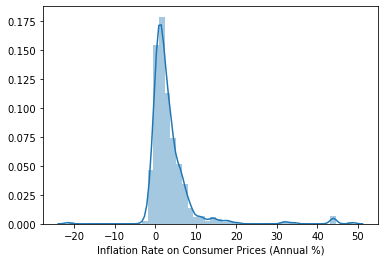

In [214]:
sns.distplot(df['Inflation Rate on Consumer Prices (Annual %)'])

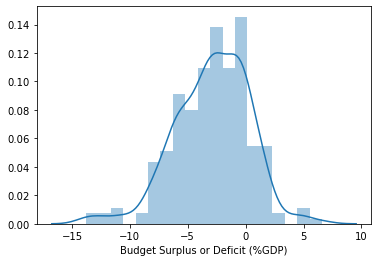

In [172]:
 sns.distplot((df['Budget Surplus or Deficit (%GDP)']))

In [170]:
df['Budget Surplus or Deficit (%GDP)'].describe()

count    512.000000
mean      -2.886901
std        3.223805
min      -13.800000
25%       -4.900000
50%       -2.700000
75%       -0.500000
max        6.600000
Name: Budget Surplus or Deficit (%GDP), dtype: float64

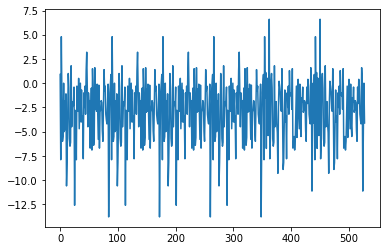

In [169]:
plt.plot(df['Budget Surplus or Deficit (%GDP)'])

In [167]:
# df.drop(df[df['Budget Surplus or Deficit (%GDP)'] == -64.1].index, inplace=True)
# df.drop(df[df['Budget Surplus or Deficit (%GDP)'] == -25.1].index, inplace=True)
# df.drop(df[df['Budget Surplus or Deficit (%GDP)'] == 25.6].index, inplace=True)
# df.drop(df[df['Budget Surplus or Deficit (%GDP)'] == 10].index, inplace=True)

In [171]:
df[df['Budget Surplus or Deficit (%GDP)'] == -13.8]

,Country,Country Code,Year,GDP per Capita (PPP),Budget Surplus or Deficit (%GDP),Gross Savings %GDP,Inflation Rate on Consumer Prices (Annual %),Tax Revenue %GDP,Health Expenditure (%GDP),Education Expenditure (%GDP),"Science, Tech, Innovation R&D Expenditure (%GDP)",Military Expenditure %GDP,Fossil Fuel (%),Hydroelectric Plants (%),Renewable Energy Sources (%),SPI Year,Social Progress Index
84,Mongolia,MNG,2013,10549.859108,-13.8,26.280052,10.490657,15.731208,40.098537,4.94077,0.23246,0.822311,88.975,1.25,8.7875,2014,63.34
172,Mongolia,MNG,2014,11056.309809,-13.8,23.445576,12.253981,12.901634,39.061367,4.71485,0.22340,0.859628,88.975,1.25,8.7875,2015,63.99
260,Mongolia,MNG,2015,10767.133199,-13.8,20.695566,5.726872,11.762814,33.612694,4.17699,0.15468,0.866220,94.900,0.00,5.1000,2016,65.19
348,Mongolia,MNG,2016,10742.653092,-13.8,24.185840,0.742301,11.345530,40.509930,5.18061,0.18337,0.865523,87.000,1.00,8.0500,2017,65.41


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country                                           522 non-null    object 
 1   Country Code                                      522 non-null    object 
 2   Year                                              522 non-null    int64  
 3   GDP per Capita (PPP)                              522 non-null    float64
 4   Budget Surplus or Deficit (%GDP)                  522 non-null    float64
 5   Gross Savings %GDP                                522 non-null    float64
 6   Inflation Rate on Consumer Prices (Annual %)      522 non-null    float64
 7   Tax Revenue %GDP                                  522 non-null    float64
 8   Health Expenditure (%GDP)                         522 non-null    float64
 9   Education Expenditure

# Residuals Plot

In [293]:
X = features
y = target

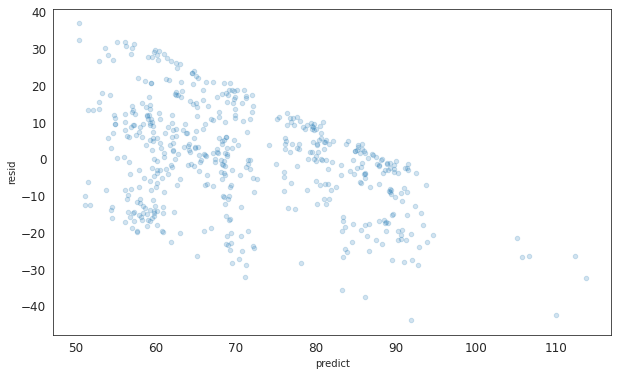

In [297]:
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X.values)
X_val_poly = poly.transform(X.values)
X_test_poly = poly.transform(X.values)

lm_poly = LinearRegression()
fit = lm_poly.fit(X, y)

df['predict']=fit.predict(X)
df['resid']=target-df.predict
with sns.axes_style('white'):
    plot=data.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6), fontsize=12)


In [288]:
df

,Country,Country Code,Year,GDP per Capita (PPP),Budget Surplus or Deficit (%GDP),Gross Savings %GDP,Inflation Rate on Consumer Prices (Annual %),Tax Revenue %GDP,Health Expenditure (%GDP),Education Expenditure (%GDP),"Science, Tech, Innovation R&D Expenditure (%GDP)",Military Expenditure %GDP,Fossil Fuel (%),Hydroelectric Plants (%),Renewable Energy Sources (%),SPI Year,Social Progress Index,predict,resid
0,Angola,AGO,2013,7682.477158,0.900000,32.029882,8.777814,14.184763,37.049564,3.42132,0.032290,4.455239,36.800000,60.250000,1.587500,2014,38.51,54.577343,-16.067343
1,Botswana,BWA,2013,14707.701699,-7.900000,36.664808,5.884607,25.609893,33.341854,9.63292,0.537280,2.056396,99.625000,0.000000,0.562500,2014,62.99,64.733806,-1.743806
2,Burkina Faso,BFA,2013,1683.107411,4.800000,16.917850,0.533739,14.948642,28.408018,4.59384,0.509164,1.392049,81.725000,9.562500,8.737500,2014,42.94,63.010095,-20.070095
3,Burundi,BDI,2013,740.984231,-1.500000,3.933888,7.937958,31.351000,33.161716,5.99536,0.210280,2.367638,13.800000,77.050000,10.400000,2014,38.10,57.662692,-19.562692
4,Ethiopia,ETH,2013,1283.570926,-6.000000,28.334779,7.464022,8.764725,17.755827,4.49855,0.604740,0.806417,4.125000,83.562500,11.900000,2014,39.31,51.820106,-12.510106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Malaysia,MYS,2018,28186.704943,0.300000,25.728034,0.884709,12.029692,21.869098,4.53477,1.436650,0.984002,78.000000,18.000000,4.000000,2019,74.17,71.256548,2.913452
518,Mongolia,MNG,2018,12196.750263,-11.133333,25.950801,6.812436,16.776785,30.284721,4.08578,0.102930,0.761588,87.000000,2.000000,11.000000,2019,65.60,65.985813,-0.385813
519,New Zealand,NZL,2018,42810.837512,-4.800000,18.684779,1.598297,28.001078,35.873516,6.44277,1.365700,1.161388,23.266667,58.000000,20.000000,2019,88.93,78.840839,10.089161
520,Philippines,PHL,2018,8717.047981,0.000000,33.807051,5.211605,14.047533,19.911036,2.65295,0.164150,1.129324,68.900000,16.666667,15.733333,2019,63.40,57.939202,5.460798


# Q-Q Plot

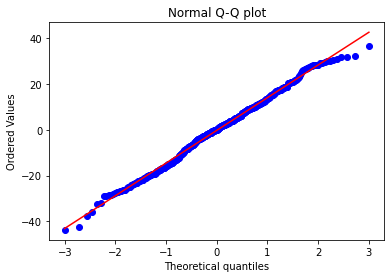

In [298]:
# diagnose/inspect residual normality using qqplot:
stats.probplot(data['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# Graphing GDPs and SPIs 2019

In [313]:
pivot = pd.pivot_table(df, index = ['Country', 'Country Code', 'Year'], values = ['SPI Year', 'Social Progress Index', 'GDP per Capita (PPP)',
       'Budget Surplus or Deficit (%GDP)', 'Gross Savings %GDP',
       'Inflation Rate on Consumer Prices (Annual %)', 'Tax Revenue %GDP',
       'Health Expenditure (%GDP)', 'Education Expenditure (%GDP)',
       'Science, Tech, Innovation R&D Expenditure (%GDP)',
       'Military Expenditure %GDP', 'Fossil Fuel (%)',
       'Hydroelectric Plants (%)', 'Renewable Energy Sources (%)']).reset_index()

In [318]:
sorted_pivot = pivot.sort_values(by=['SPI Year', 'Social Progress Index'], ascending=False)

In [625]:
key_countries = ['China', 'Brazil', 'Costa Rica', 'New Zealand',
                 'Japan', 'South Korea', 'Singapore', 'Saudi Arabia', 'Tunisia']
df_2019 = df[df['SPI Year']==2019]
df_19_keys = df_2019[df_2019.Country.isin(key_countries)]

In [626]:
X_keys = df_19_keys['GDP per Capita (PPP)']
y_keys = df_19_keys['Social Progress Index']

<ipython-input-685-4261b5889ccc>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, -44.444 + 11.906*np.log(x), '--', c='gray')


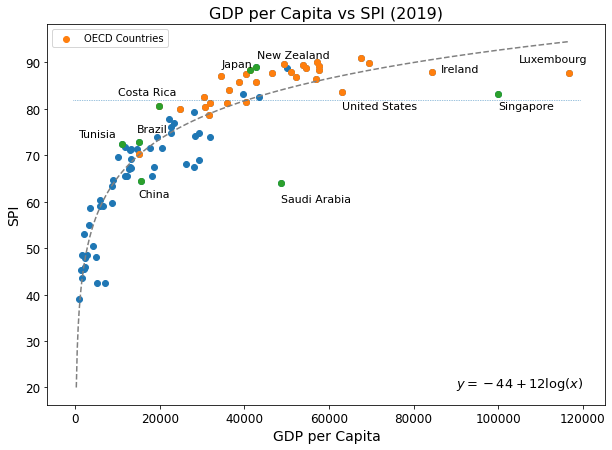

In [685]:
plt.figure(figsize=(10,7))
plt.plot(x, -44.444 + 11.906*np.log(x), '--', c='gray')
plt.scatter(pivot[pivot['SPI Year']==2019]['GDP per Capita (PPP)'], pivot[pivot['SPI Year']==2019]['Social Progress Index'])
plt.scatter(oecd_2019['GDP per Capita (PPP)'], oecd_2019['Social Progress Index'], label='OECD Countries')
plt.scatter(X_keys, y_keys)
plt.title('GDP per Capita vs SPI (2019)', size=16)
plt.ylabel('SPI', size = 14)
plt.xlabel('GDP per Capita', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.text(x= 90000, y = 20, s='$y = -44 + 12\log(x)$', size = 13)
plt.text(x= 48700, y = 60, s='Saudi Arabia', size = 11)
plt.text(x= 63000, y = 80, s='United States', size = 11)
plt.text(x= 15000, y = 61, s='China', size = 11)
plt.text(x= 14500, y = 75, s='Brazil', size = 11)
plt.text(x= 10000, y = 83, s='Costa Rica', size = 11)
plt.text(x= 34500, y = 89, s='Japan', size = 11)
plt.text(x= 43000, y = 91, s='New Zealand', size = 11)
plt.text(x= 86500, y = 88, s='Ireland', size = 11)
plt.text(x= 105000, y = 90, s='Luxembourg', size = 11)
plt.text(x= 100000, y = 80, s='Singapore', size = 11)
plt.text(x= 800, y = 74, s='Tunisia', size = 11)
plt.plot(np.arange(-600, 120000, 10000), [82]*13, linewidth = 0.65, linestyle=':')
plt.legend()
plt.savefig('GDPvSPI_2019.svg');

In [369]:
x = np.linspace(0, max(pivot['GDP per Capita (PPP)']),len(pivot))

In [394]:
lr = LinearRegression()
X = np.array(np.log(pivot[pivot['SPI Year']==2019]['GDP per Capita (PPP)'])).reshape(-1,1)
y = np.array(pivot[pivot['SPI Year']==2019]['Social Progress Index'])
log_fit = lr.fit(X, y)
log_fit.coef_

array([11.90681028])

In [395]:
log_fit.intercept_

-44.44459730973922

# Comparing with OECD Countries

In [391]:
oecd_countries = ['AUS','AUT','BEL','CHE','CHL','COL','CRI','CZE','DEU','DNK','ESP','EST','FIN','FRA','GBR','GRC',
                  'HUN','IRL','ISL','ISR','ITA','JPN','KOR','LTU','LUX','LVA','NLD','NOR','POL','PRT','SVK','SVN',
                  'SWE','USA']

In [582]:
oecd_SPI = pivot[pivot['Country Code'].isin(oecd_countries)]
oecd_2019 = oecd_SPI[oecd_SPI['SPI Year']==2019]
oecd_2019[oecd_2019['GDP per Capita (PPP)']> 80000]

,Country,Country Code,Year,Budget Surplus or Deficit (%GDP),Education Expenditure (%GDP),Fossil Fuel (%),GDP per Capita (PPP),Gross Savings %GDP,Health Expenditure (%GDP),Hydroelectric Plants (%),Inflation Rate on Consumer Prices (Annual %),Military Expenditure %GDP,Renewable Energy Sources (%),SPI Year,"Science, Tech, Innovation R&D Expenditure (%GDP)",Social Progress Index,Tax Revenue %GDP
221,Ireland,IRL,2018,-5.5,3.71973,65.0,84459.651637,34.476619,26.272413,2.0,0.488370,0.330585,33.0,2019,1.14647,87.97,18.262354
275,Luxembourg,LUX,2018,-3.6,3.95519,25.0,116786.479974,17.394225,43.082691,8.0,1.528195,0.611663,67.0,2019,1.23562,87.66,26.504268


# USA GDP GrowthRate

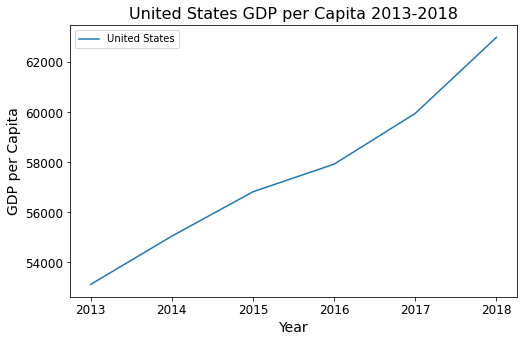

In [721]:
x = np.arange(2013, 2019)

plt.figure(figsize=(8,5))
plt.plot(x, df[df.Country=='United States']['GDP per Capita (PPP)'], label='United States')
#plt.plot(x, -3698670.24 + 1864*x, '--', c='gray', alpha=0.5)
#plt.plot(range(2014, 2020), df[df.Country=='Nicaragua']['GDP per Capita (PPP)'])
#plt.plot(range(2014, 2020), df[df.Country=='Brazil']['GDP per Capita (PPP)'])
#plt.plot(range(2014, 2020), df[df.Country=='Columbia']['GDP per Capita (PPP)'])
#plt.plot(range(2014, 2020), df[df.Country=='Hungary']['GDP per Capita (PPP)'])
plt.title('United States GDP per Capita 2013-2018', size=16)
plt.xlabel('Year', size =14)
plt.ylabel('GDP per Capita', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.legend()
#plt.text(2017.5, 53500, '$y = -3.7e6 + 1864x$', size = 12)
plt.savefig('US_GDP.svg')